In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
retail = pd.read_csv(r"C:\Users\hrap003\Desktop\Python\Data science projects\Retail pojects\UK retail data\data.csv", encoding = "Latin-1")

In [ ]:
"""
1. Show the size of the dataframe
2. Total number of rows
3. Total number of columns
"""

retail.shape

In [4]:
"""
Information about the dataframe
"""
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
"""
1. Renaming the column names
2. Used mapping dictonary technique to rename all the columns together
"""

retail = retail.rename(columns={    
    "InvoiceNo": "invoice_no",
    "StockCode": "stock_code",
    "Description": "description",
    "Quantity": "quantity",
    "InvoiceDate": "invoice_date",
    "UnitPrice": "unit_price",
    "CustomerID": "customer_id",
    "Country": "country"})

In [6]:
"""
Show renamed column names
"""
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
invoice_no      541909 non-null object
stock_code      541909 non-null object
description     540455 non-null object
quantity        541909 non-null int64
invoice_date    541909 non-null object
unit_price      541909 non-null float64
customer_id     406829 non-null float64
country         541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
"""
For analysis purpose filtering data and choosing one country which is United Kingdom
"""
retail = retail[retail["country"]== "United Kingdom"]

In [8]:
"""
Show the size of the dataframe after choosing the dataset for United Kingdom
"""

retail.shape

(495478, 8)

In [9]:
"""
1. Changing the country column data/values
2. Used the mapping dictonary techique to map the data/values
"""

column = ["country"]
convert_country_abbr = {"United Kingdom": "UK"}

for col in column:
    retail[col] = retail[col].map(convert_country_abbr)

In [10]:
"""
Checking the total number of null values for each column
"""

retail.isnull().sum(axis=0)

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     133600
country              0
dtype: int64

In [11]:
"""
1. Remove all the rows with null values
2. Perform analysis only on customers with non nulls
3. The below code will drop all the rows with nulls
"""

retail = retail.dropna()

In [12]:
"""
1. Show the size of the dataframe after dropping null rows
2. Total number of rows
3. Total number of columns
"""

retail.shape

(361878, 8)

In [13]:
"""
Check the total number of duplicate rows in the dataset
"""

retail.duplicated().sum()

5150

In [14]:
"""
1. The code below removes all the duplicate rows from the dataset
2. Keeps the first instance/row and removes the rest of the duplicated rows/instances
"""

retail = retail.drop_duplicates(keep="first")

In [15]:
"""
1. Show the size of the dataframe after removing duplicates from the dataset
2. Total number of rows
3. Total number of columns
"""

retail.shape

(356728, 8)

In [16]:
"""
1. Convert customer_id data type from float to Integer
2. Looking at the dataset it is safe to convert to Integer for analysis  purpose
"""

retail["customer_id"] = retail["customer_id"].astype(int)

In [17]:
"""
Show the total number of notnulls for each column
"""

retail.notnull().sum(axis=0)

invoice_no      356728
stock_code      356728
description     356728
quantity        356728
invoice_date    356728
unit_price      356728
customer_id     356728
country         356728
dtype: int64

In [18]:
"""
Show the total number of nulls for each column after all the clean ups
"""

retail.isnull().sum(axis=0)

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

In [19]:
"""
Check the quantities for every row
If the quantity is zero or below, remove from the dataset
Perform analysis only on the dataset with quantities greater than zero
"""

retail[retail["quantity"] <= 0].shape

(7501, 8)

In [20]:
"""
Check the quantites for every row
If the quantity is above zero, keep those rows
"""

retail[retail["quantity"] > 0].shape

(349227, 8)

In [21]:
"""
Filter the dataset further to pick only the rows with quantities greater than zero
"""

retail = retail[retail["quantity"] > 0]

In [22]:
"""
Check the size of dataset after filteration
"""

retail.shape

(349227, 8)

In [23]:
"""
Check the unit_price for every row
If the unit price is zero or below, remove the rows from the dataset
"""

retail[retail["unit_price"] <= 0].shape

(24, 8)

In [24]:
"""
Check the unit price for every row above zero unit price
"""

retail[retail["unit_price"] > 0].shape

(349203, 8)

In [25]:
"""
Filter the dataset further to pick only the rows with unit price greater than zero
"""

retail = retail[retail["unit_price"] > 0]

In [26]:
"""
Check the size of the dataset after filtering
"""

retail.shape

(349203, 8)

In [27]:
"""
Convert invoice date column from string to datetime object
and create a new column
"""

retail['invoice_month'] = pd.to_datetime(retail["invoice_date"]).dt.to_period('M')

In [28]:
"""
Checking the unique/distinct number of customers
"""
retail["customer_id"].nunique()

3920

In [29]:
"""
Analyse the customers who purchased the most by unit price
Show top 5 coustomers based on the purchases by unit price
"""

retail.groupby("customer_id")["unit_price"].sum().head()

customer_id
12346        1.04
12747      449.89
12748    11788.31
12749      994.99
12820      112.38
Name: unit_price, dtype: float64

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


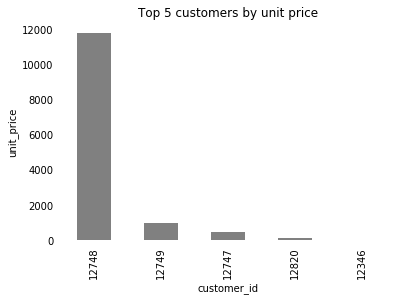

In [30]:
"""
Create a plot to show "Top 5 Customers by purchases by unit price"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail.groupby("customer_id")["unit_price"].sum().head().sort_values(ascending=False).plot.bar(color="grey")
ax.set_xlabel("customer_id")
ax.set_ylabel("unit_price")
ax.set_title("Top 5 customers by unit price")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()

In [31]:
"""
Show the total number of times a customer purchased
Show top 5 customers who shopped the most
"""
retail["customer_id"].value_counts().head()

17841    7676
14096    5111
12748    4412
14606    2677
15311    2366
Name: customer_id, dtype: int64

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


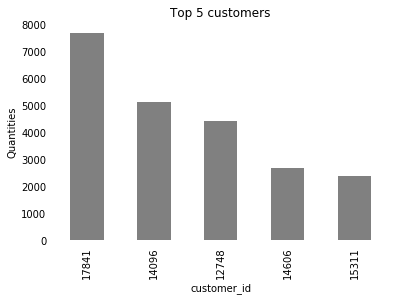

In [32]:
"""
Create a plot to show "Top 5 customers who shopped the most"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail["customer_id"].value_counts().head().sort_values(ascending=False).plot.bar(color="grey")
ax.set_xlabel("customer_id")
ax.set_ylabel("Quantities")
ax.set_title("Top 5 customers")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()

In [33]:
"""
Check the total number of unique products by descriptions
"""

retail["description"].nunique()

3844

In [34]:
"""
Show the most products sold by quantities
Show the top 5 products purchased by quantities
"""

retail.groupby("description")["quantity"].sum().head()

description
 4 PURPLE FLOCK DINNER CANDLES     132
 50'S CHRISTMAS GIFT BAG LARGE    1697
 DOLLY GIRL BEAKER                 657
 I LOVE LONDON MINI BACKPACK       180
 NINE DRAWER OFFICE TIDY            43
Name: quantity, dtype: int64

C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


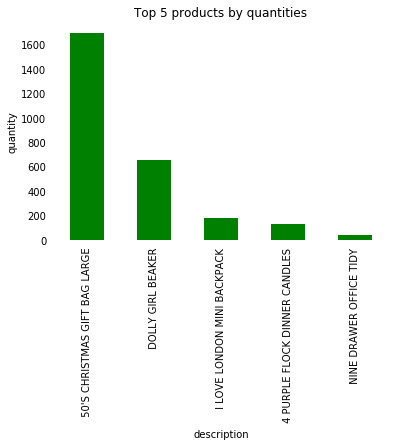

In [35]:
"""
Create a plot show "Top 5 products sold by quantities"
"""

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax = retail.groupby("description")["quantity"].sum().head().sort_values(ascending=False).plot.bar(color = "green")
ax.set_xlabel("description")
ax.set_ylabel("quantity")
ax.set_title("Top 5 products by quantities")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)
        
plt.show()


C:\Anaconda\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


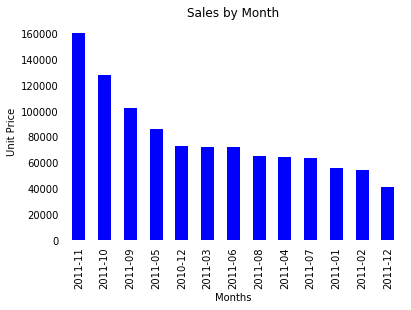

In [37]:
"""
Create a plot to show "Sales by Month"
"""


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

months = retail['invoice_month'].sort_values()
start_month = months.iloc[0]
end_month = months.iloc[-1]

index = pd.PeriodIndex(start=start_month, end=end_month)
ax = retail.groupby('invoice_month')['unit_price'].sum().reindex(index).sort_values(ascending=False).plot.bar(color = "blue")

ax.set_xlabel("Months")
ax.set_ylabel("Unit Price")
ax.set_title("Sales by Month")
ax.tick_params(bottom="off", top="off", left="off", right="off")

for key,spine in ax.spines.items():
        spine.set_visible(False)

plt.show()

In [64]:
retail.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country,invoice_month,invoice_day
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,UK,2010-12,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,UK,2010-12,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,UK,2010-12,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,UK,2010-12,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,UK,2010-12,2010-12-01
